In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('./all_days_stats_by_currencies.xlsx')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
df.head(10)

,Moneda,Id,Oferta
Fecha,,,
2021-01-02 13:00:02,USD,61acb42dab932e127b42177e,50.0
2021-01-07 19:12:15,USD,61acb883bc2bca1ccad3d63d,49.0
2021-01-09 03:15:10,USD,61acb948bc2bca1ccad3d7a5,40.0
2021-01-10 20:44:38,USD,61acba13bc2bca1ccad3d92f,37.5
2021-01-14 20:04:20,USD,61acb241ab932e127b4212c9,42.0
2021-01-20 18:28:01,MLC,61acbe52bc2bca1ccad3e231,42.5
2021-01-21 03:23:10,MLC,61acbec3bc2bca1ccad3e2f3,42.5
2021-01-21 15:50:40,MLC,61acbf09bc2bca1ccad3e3fc,45.0
2021-01-22 18:57:31,MLC,61acbf4abc2bca1ccad3e466,43.0


In [20]:
def get_lower_upper_bond_iql(values):
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)

    lower_iqd = q1 - 1.5*(q3-q1)
    upper_iqd = q3 + 1.5*(q3-q1)

    return lower_iqd, upper_iqd


def get_mean_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()

def get_median_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_lower_upper_bond_std(ti):
    std = ti.std()
    m = np.median(ti)
    return m-3*std, m+3*std

def get_median_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_mean_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()


daily_mean_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_iql})
daily_mean_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_std})
daily_median_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_iql})
daily_median_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_std})

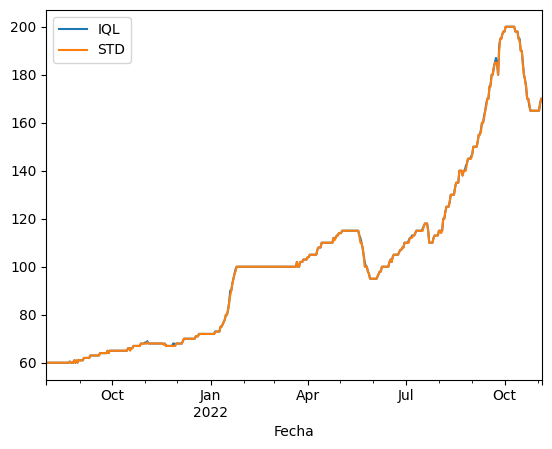

In [18]:
daily_median_iql_usd = daily_median_iql.loc['USD'][daily_median_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['USD'][daily_median_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

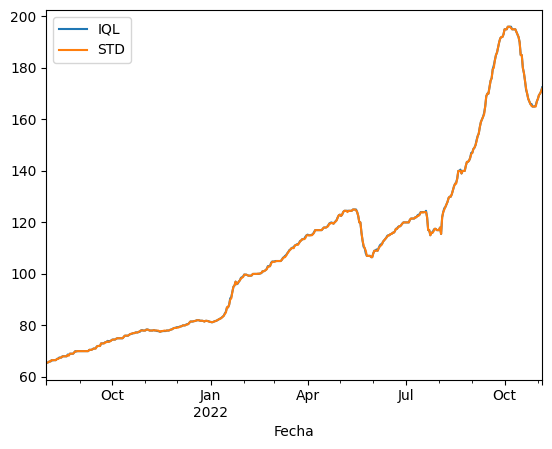

In [16]:
daily_median_iql_usd = daily_median_iql.loc['MLC'][daily_median_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['MLC'][daily_median_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

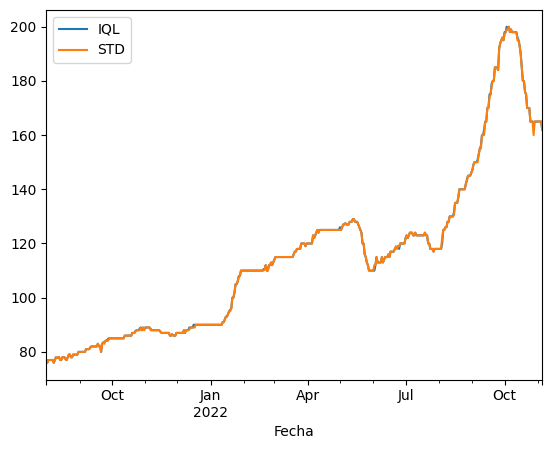

In [19]:
daily_median_iql_usd = daily_median_iql.loc['ECU'][daily_median_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['ECU'][daily_median_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()


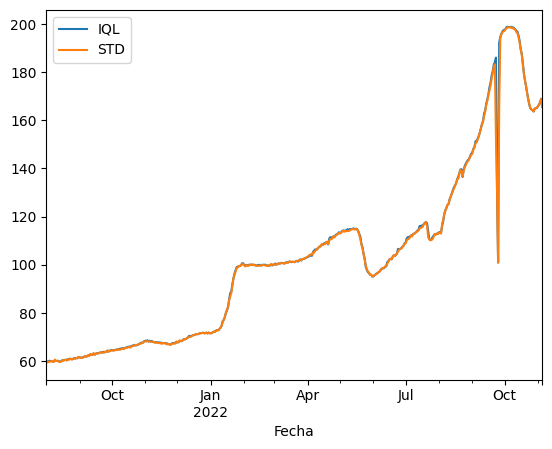

In [21]:
daily_mean_iql_usd = daily_mean_iql.loc['USD'][daily_mean_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['USD'][daily_mean_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

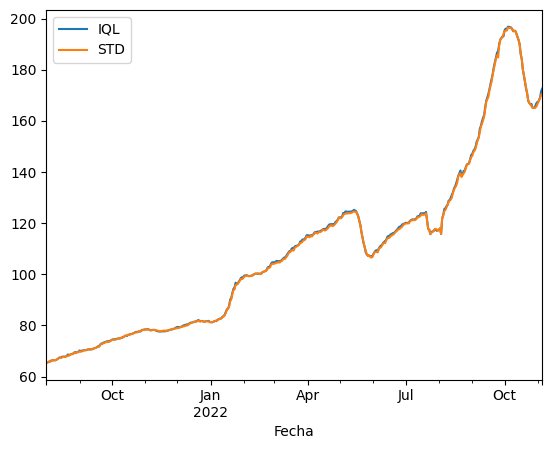

In [22]:
daily_mean_iql_usd = daily_mean_iql.loc['MLC'][daily_mean_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['MLC'][daily_mean_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

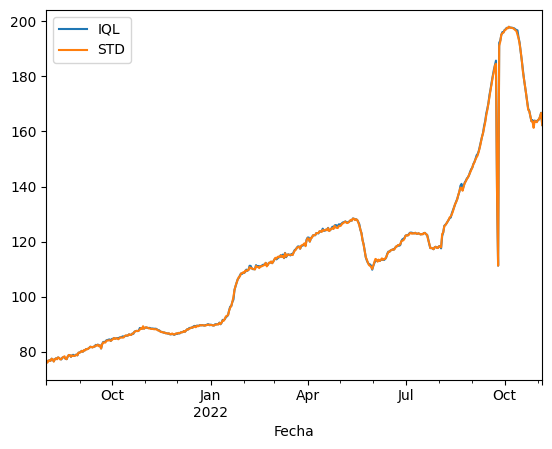

In [23]:
daily_mean_iql_usd = daily_mean_iql.loc['ECU'][daily_mean_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['ECU'][daily_mean_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

<AxesSubplot:xlabel='Fecha'>

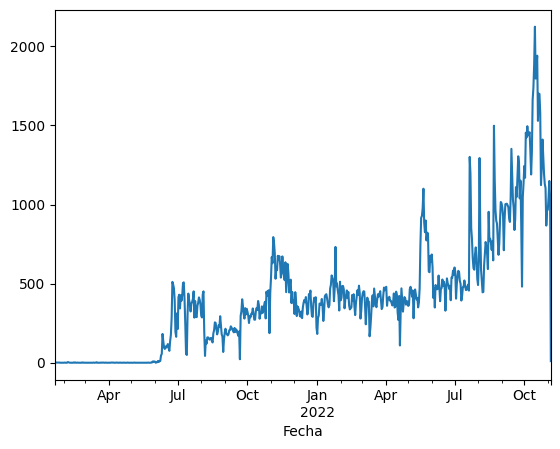

In [49]:
def number_people(ti):
   return ti.shape[0]

part = df.groupby('Moneda').resample('d').agg({'Oferta':number_people})
part.loc['MLC'].Oferta.plot()

Fecha
2022-10-12 00:00:10    192.0
2022-10-12 00:00:40    192.0
2022-10-12 00:04:13    192.0
2022-10-12 00:06:35    200.0
2022-10-12 00:07:08    195.0
                       ...  
2022-10-12 23:59:03    195.0
2022-10-12 23:59:15    196.0
2022-10-12 23:59:21    185.0
2022-10-12 23:59:33    195.0
2022-10-12 23:59:35    191.0
Name: MLC, Length: 1662, dtype: float64
(1649,)


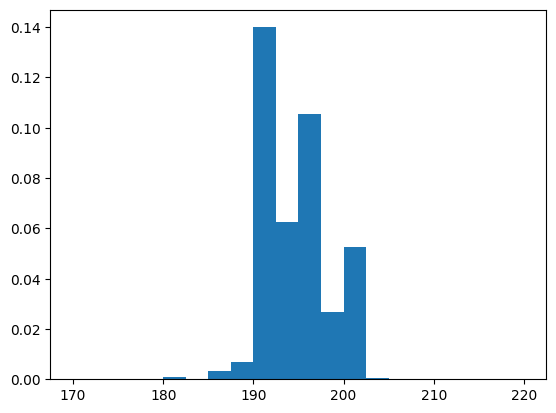

Fecha
2022-10-13 00:00:21    195.0
2022-10-13 00:00:37    195.0
2022-10-13 00:01:11    196.0
2022-10-13 00:01:16    192.0
2022-10-13 00:04:11    195.0
                       ...  
2022-10-13 23:56:16    190.0
2022-10-13 23:56:41    188.0
2022-10-13 23:56:51    188.0
2022-10-13 23:59:30    185.0
2022-10-13 23:59:44    184.0
Name: MLC, Length: 1737, dtype: float64
(1731,)


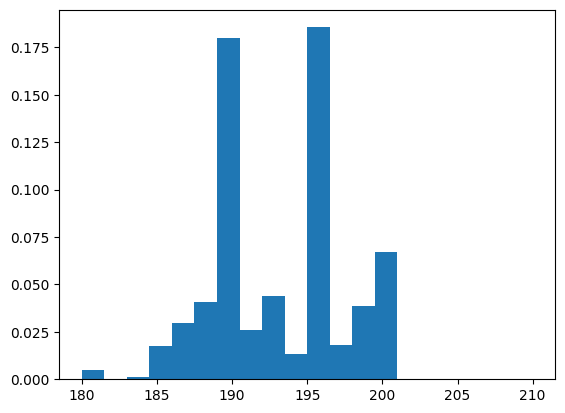

Fecha
2022-10-14 00:00:29    190.0
2022-10-14 00:01:46    185.0
2022-10-14 00:02:12    195.0
2022-10-14 00:02:22    195.0
2022-10-14 00:02:51    190.0
                       ...  
2022-10-14 23:58:36    189.5
2022-10-14 23:59:17    192.0
2022-10-14 23:59:38    192.0
2022-10-14 23:59:39    190.0
2022-10-14 23:59:49    187.0
Name: MLC, Length: 1887, dtype: float64
(1879,)


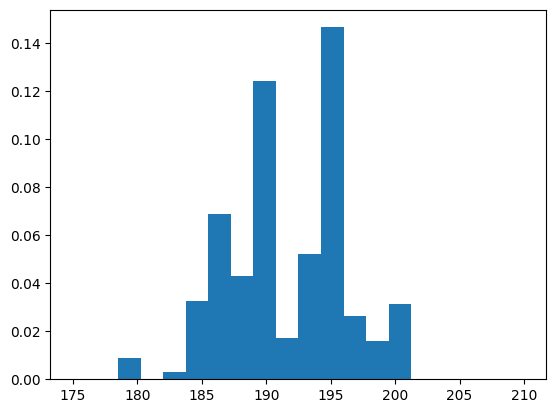

Fecha
2022-10-15 00:01:45    195.0
2022-10-15 00:01:58    188.0
2022-10-15 00:03:10    188.0
2022-10-15 00:03:53    195.0
2022-10-15 00:04:39    190.0
                       ...  
2022-10-15 23:57:44    190.0
2022-10-15 23:57:59    190.0
2022-10-15 23:58:43    184.0
2022-10-15 23:59:28    197.0
2022-10-15 23:59:47    195.0
Name: MLC, Length: 2124, dtype: float64
(2112,)


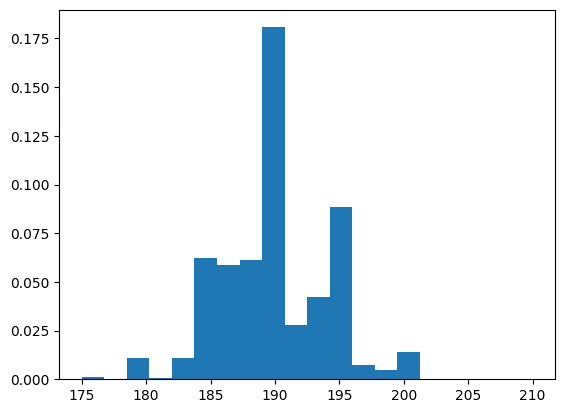

Fecha
2022-10-16 00:00:34    195.0
2022-10-16 00:01:14    184.0
2022-10-16 00:01:30    190.0
2022-10-16 00:02:34    192.0
2022-10-16 00:02:35    195.0
                       ...  
2022-10-16 23:57:22    190.0
2022-10-16 23:58:02    185.0
2022-10-16 23:59:05    182.0
2022-10-16 23:59:08    185.0
2022-10-16 23:59:56    190.0
Name: MLC, Length: 1796, dtype: float64
(1790,)


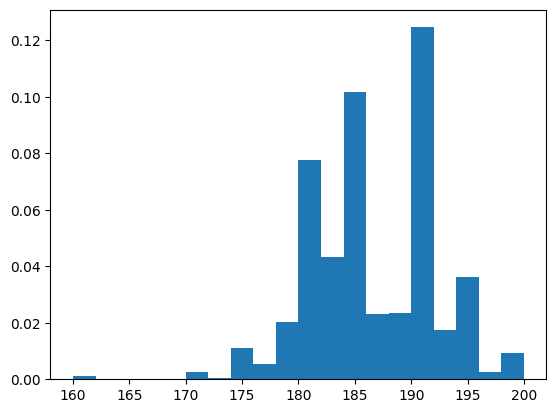

Fecha
2022-10-17 00:00:48    190.0
2022-10-17 00:00:56    185.0
2022-10-17 00:03:03    190.0
2022-10-17 00:04:16    192.0
2022-10-17 00:04:42    175.0
                       ...  
2022-10-17 23:57:02    192.0
2022-10-17 23:57:38    190.0
2022-10-17 23:59:03    187.0
2022-10-17 23:59:16    175.0
2022-10-17 23:59:56    172.0
Name: MLC, Length: 1863, dtype: float64
(1847,)


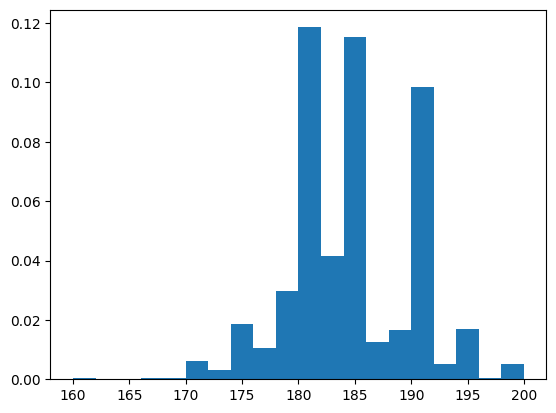

Fecha
2022-10-18 00:00:35    175.0
2022-10-18 00:00:39    184.0
2022-10-18 00:02:57    185.0
2022-10-18 00:03:14    177.0
2022-10-18 00:03:53    175.0
                       ...  
2022-10-18 23:58:41    175.0
2022-10-18 23:59:06    185.0
2022-10-18 23:59:14    180.0
2022-10-18 23:59:30    187.0
2022-10-18 23:59:50    175.0
Name: MLC, Length: 1941, dtype: float64
(1932,)


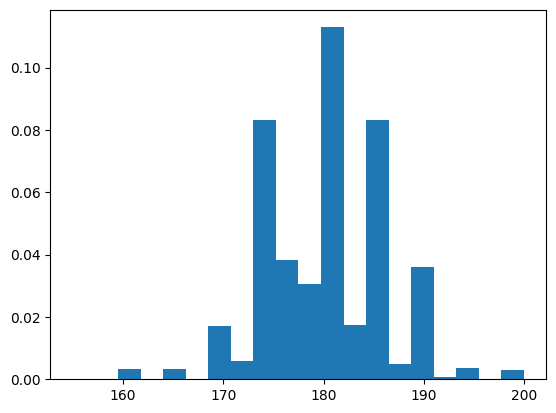

Fecha
2022-10-19 00:01:22    175.0
2022-10-19 00:02:13    178.0
2022-10-19 00:02:55    185.0
2022-10-19 00:03:16    176.0
2022-10-19 00:04:05    175.0
                       ...  
2022-10-19 23:58:38    190.0
2022-10-19 23:59:10    170.0
2022-10-19 23:59:39    180.0
2022-10-19 23:59:51    180.0
2022-10-19 23:59:51    173.0
Name: MLC, Length: 1529, dtype: float64
(1523,)


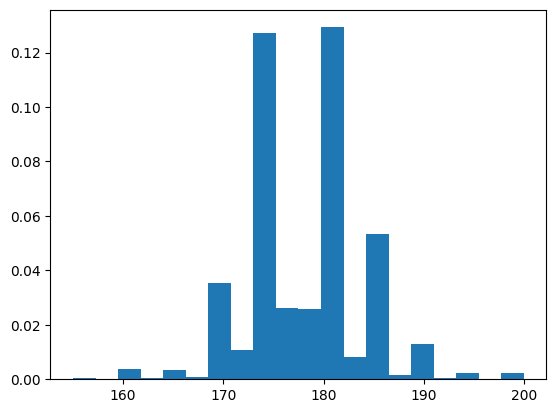

Fecha
2022-10-20 00:00:51    173.0
2022-10-20 00:01:06    170.0
2022-10-20 00:01:22    175.0
2022-10-20 00:02:09    185.0
2022-10-20 00:02:33    175.0
                       ...  
2022-10-20 23:59:09    170.0
2022-10-20 23:59:19    170.0
2022-10-20 23:59:36    175.0
2022-10-20 23:59:42    170.0
2022-10-20 23:59:56    170.0
Name: MLC, Length: 1701, dtype: float64
(1696,)


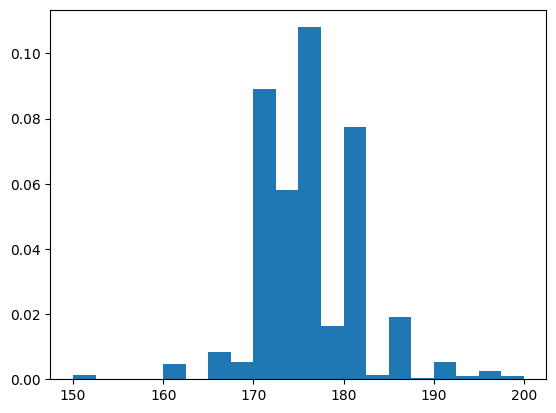

Fecha
2022-10-21 00:00:16    180.0
2022-10-21 00:00:35    173.0
2022-10-21 00:01:46     25.0
2022-10-21 00:01:56    172.0
2022-10-21 00:03:15    172.0
                       ...  
2022-10-21 23:57:30    150.0
2022-10-21 23:58:24    170.0
2022-10-21 23:58:44    169.5
2022-10-21 23:58:50    170.0
2022-10-21 23:58:59    170.0
Name: MLC, Length: 1699, dtype: float64
(1681,)


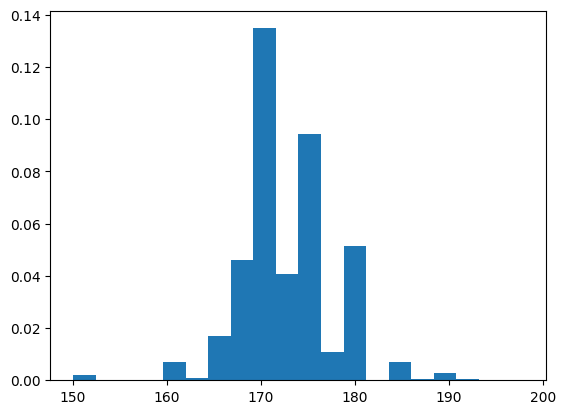

Fecha
2022-10-22 00:00:03    175.0
2022-10-22 00:01:41    171.0
2022-10-22 00:01:53    169.0
2022-10-22 00:02:36    174.0
2022-10-22 00:02:57    174.0
                       ...  
2022-10-22 23:58:50    166.0
2022-10-22 23:59:08    165.0
2022-10-22 23:59:33    170.0
2022-10-22 23:59:45    164.0
2022-10-22 23:59:55    170.0
Name: MLC, Length: 1579, dtype: float64
(1569,)


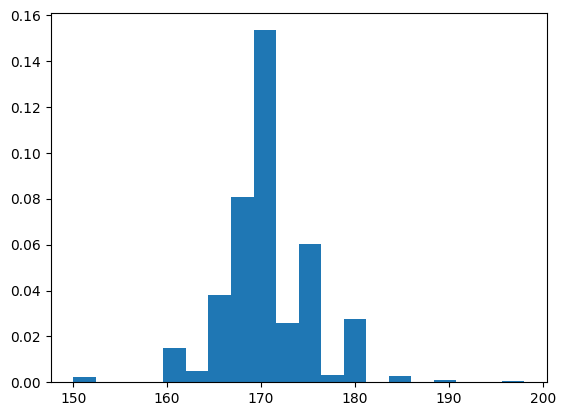

Fecha
2022-10-03 00:00:54    198.0
2022-10-03 00:05:53    205.0
2022-10-03 00:06:10    196.0
2022-10-03 00:07:07    198.0
2022-10-03 00:09:07    200.0
                       ...  
2022-10-03 23:59:02    195.0
2022-10-03 23:59:18    200.0
2022-10-03 23:59:19    195.0
2022-10-03 23:59:20    195.0
2022-10-03 23:59:44    200.0
Name: USD, Length: 1568, dtype: float64
(1554,)


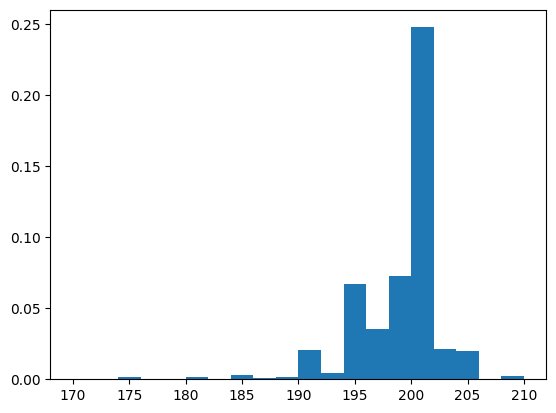

Fecha
2022-10-12 00:00:07    196.0
2022-10-12 00:01:26    195.0
2022-10-12 00:01:42    200.0
2022-10-12 00:02:41    198.0
2022-10-12 00:03:12    190.0
                       ...  
2022-10-12 23:59:04    193.0
2022-10-12 23:59:21    185.0
2022-10-12 23:59:33    195.0
2022-10-12 23:59:33    200.0
2022-10-12 23:59:55    200.0
Name: USD, Length: 1522, dtype: float64
(1501,)


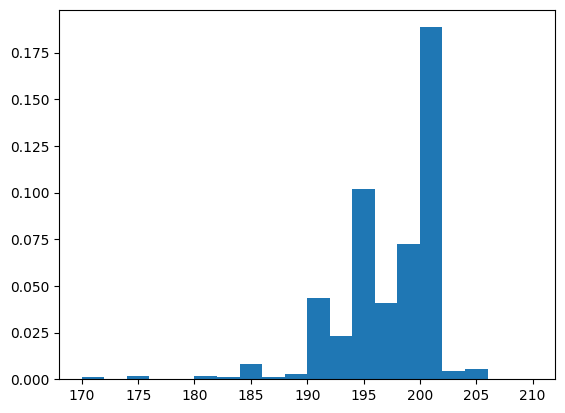

Fecha
2022-10-13 00:00:22    200.0
2022-10-13 00:02:09    195.0
2022-10-13 00:02:15    198.0
2022-10-13 00:02:49    200.0
2022-10-13 00:04:27    195.0
                       ...  
2022-10-13 23:55:50    195.0
2022-10-13 23:56:29    200.0
2022-10-13 23:56:31    188.0
2022-10-13 23:57:21    198.0
2022-10-13 23:58:58    185.0
Name: USD, Length: 1668, dtype: float64
(1646,)


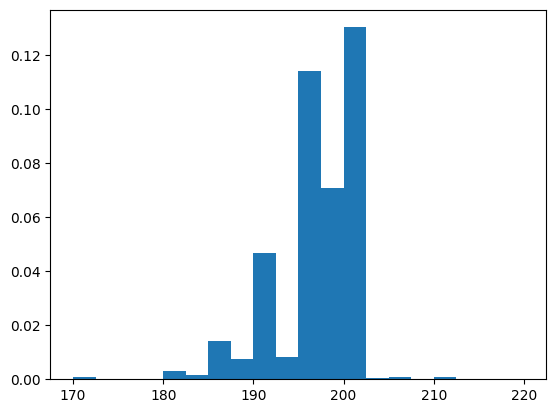

Fecha
2022-10-14 00:01:30    198.0
2022-10-14 00:03:16    190.0
2022-10-14 00:03:57    198.0
2022-10-14 00:04:41    198.0
2022-10-14 00:04:52    190.0
                       ...  
2022-10-14 23:57:41    190.0
2022-10-14 23:57:47    197.0
2022-10-14 23:57:55    196.0
2022-10-14 23:58:06    180.0
2022-10-14 23:58:15    198.0
Name: USD, Length: 2153, dtype: float64
(2137,)


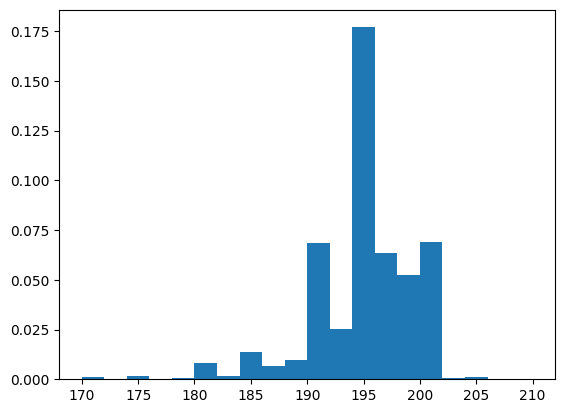

Fecha
2022-10-15 00:00:37    195.0
2022-10-15 00:00:45    195.0
2022-10-15 00:02:20    195.0
2022-10-15 00:02:38    190.0
2022-10-15 00:03:28    194.0
                       ...  
2022-10-15 23:58:57    195.0
2022-10-15 23:59:12    192.0
2022-10-15 23:59:39    185.0
2022-10-15 23:59:48    195.0
2022-10-15 23:59:51    192.0
Name: USD, Length: 2418, dtype: float64
(2395,)


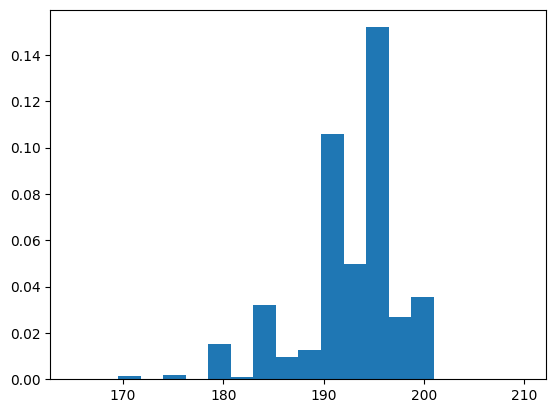

Fecha
2022-10-16 00:00:12    194.0
2022-10-16 00:01:03    190.0
2022-10-16 00:02:02    195.0
2022-10-16 00:02:24    197.0
2022-10-16 00:03:23    190.0
                       ...  
2022-10-16 23:58:51    184.0
2022-10-16 23:58:55    185.0
2022-10-16 23:59:08    190.0
2022-10-16 23:59:25    190.0
2022-10-16 23:59:47    190.0
Name: USD, Length: 2208, dtype: float64
(2186,)


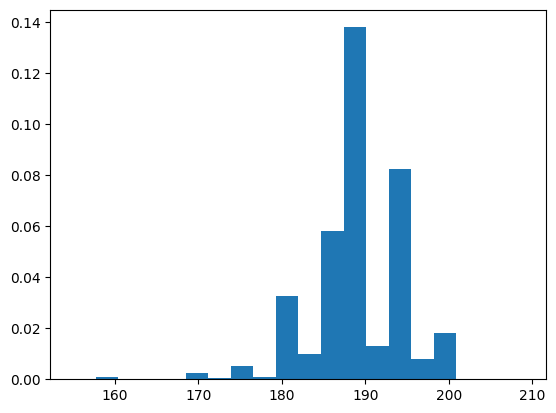

Fecha
2022-10-17 00:00:00    190.0
2022-10-17 00:00:15    185.0
2022-10-17 00:00:17    100.0
2022-10-17 00:01:45    190.0
2022-10-17 00:02:14    190.0
                       ...  
2022-10-17 23:57:40    180.0
2022-10-17 23:58:29    182.0
2022-10-17 23:58:33    190.0
2022-10-17 23:58:48    187.0
2022-10-17 23:59:06    185.0
Name: USD, Length: 2251, dtype: float64
(2227,)


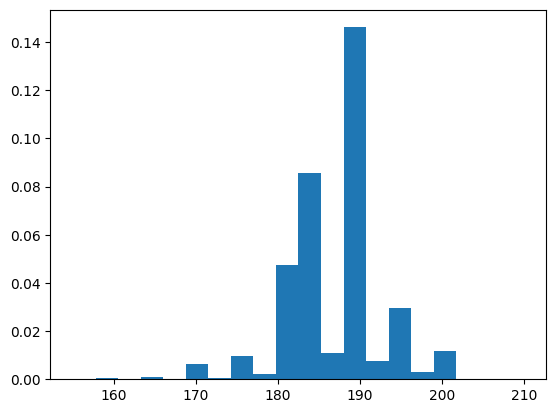

Fecha
2022-10-18 00:00:09    180.0
2022-10-18 00:00:33    185.0
2022-10-18 00:00:41    185.0
2022-10-18 00:01:11    185.0
2022-10-18 00:02:33    190.0
                       ...  
2022-10-18 23:55:56    185.0
2022-10-18 23:57:20    195.0
2022-10-18 23:58:21    190.0
2022-10-18 23:58:56    185.0
2022-10-18 23:59:53    185.0
Name: USD, Length: 2305, dtype: float64
(2289,)


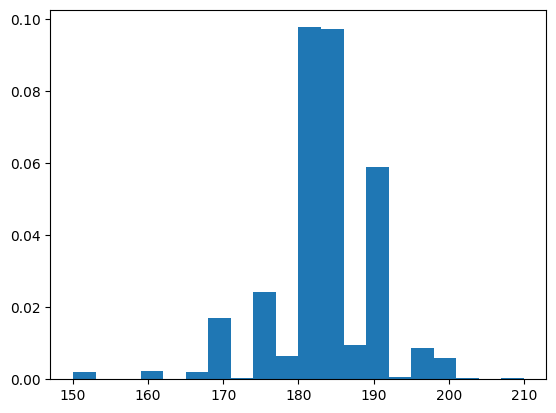

Fecha
2022-10-19 00:00:19    200.0
2022-10-19 00:00:43    185.0
2022-10-19 00:00:53    182.0
2022-10-19 00:01:33    190.0
2022-10-19 00:01:46    185.0
                       ...  
2022-10-19 23:57:07    185.0
2022-10-19 23:57:18    180.0
2022-10-19 23:57:31    185.0
2022-10-19 23:57:56    170.0
2022-10-19 23:59:10    170.0
Name: USD, Length: 2171, dtype: float64
(2152,)


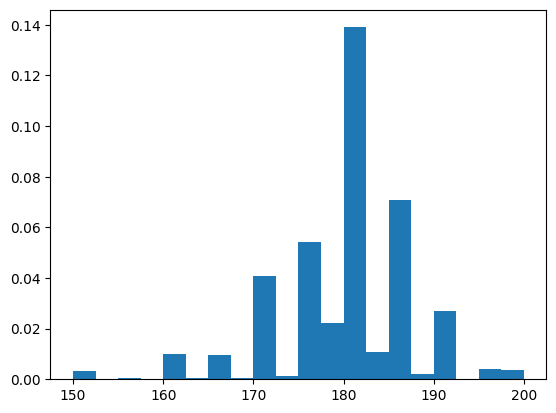

Fecha
2022-10-20 00:00:49    177.0
2022-10-20 00:01:06    170.0
2022-10-20 00:01:10    185.0
2022-10-20 00:01:41    150.0
2022-10-20 00:01:59    165.0
                       ...  
2022-10-20 23:55:02    175.0
2022-10-20 23:57:04    170.0
2022-10-20 23:57:49    180.0
2022-10-20 23:58:23    170.0
2022-10-20 23:58:24    165.0
Name: USD, Length: 2066, dtype: float64
(2053,)


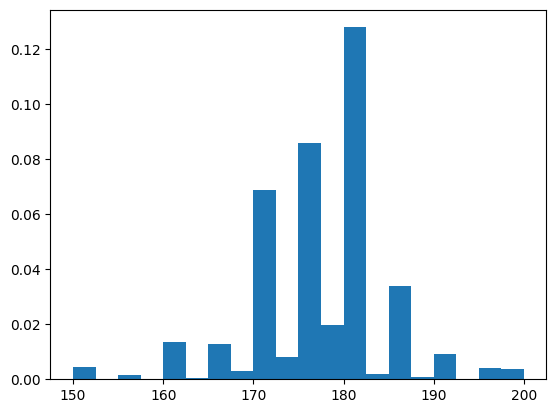

Fecha
2022-10-21 00:01:25    173.0
2022-10-21 00:01:32    170.0
2022-10-21 00:01:57    178.0
2022-10-21 00:02:03    173.0
2022-10-21 00:02:05    175.0
                       ...  
2022-10-21 23:57:19    175.0
2022-10-21 23:57:31    150.0
2022-10-21 23:59:13    175.0
2022-10-21 23:59:50    185.0
2022-10-21 23:59:58    165.0
Name: USD, Length: 1934, dtype: float64
(1914,)


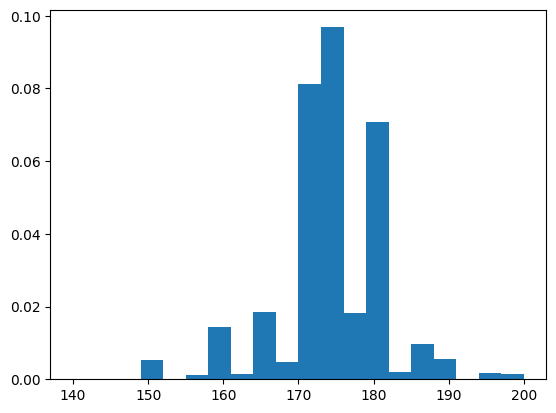

Fecha
2022-10-22 00:00:05    200.0
2022-10-22 00:00:42    172.0
2022-10-22 00:00:54    160.0
2022-10-22 00:01:05    172.0
2022-10-22 00:01:46    180.0
                       ...  
2022-10-22 23:57:31    170.0
2022-10-22 23:57:41    180.0
2022-10-22 23:58:22    170.0
2022-10-22 23:59:29    175.0
2022-10-22 23:59:29    160.0
Name: USD, Length: 1795, dtype: float64
(1773,)


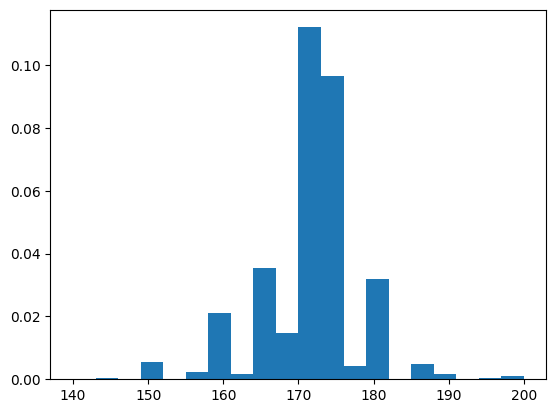

Fecha
2022-10-23 00:02:04    190.0
2022-10-23 00:04:36    170.0
2022-10-23 00:04:49    180.0
2022-10-23 00:05:35    175.0
2022-10-23 00:06:17    170.0
                       ...  
2022-10-23 23:55:05    173.0
2022-10-23 23:56:21    160.0
2022-10-23 23:56:44    163.0
2022-10-23 23:59:25    170.0
2022-10-23 23:59:43    165.0
Name: USD, Length: 1622, dtype: float64
(1605,)


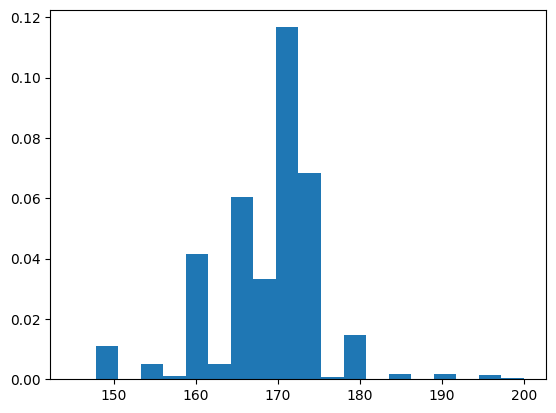

Fecha
2022-10-24 00:00:25    175.0
2022-10-24 00:01:29    165.0
2022-10-24 00:04:24    175.0
2022-10-24 00:04:30    175.0
2022-10-24 00:07:08    170.0
                       ...  
2022-10-24 23:56:12    160.0
2022-10-24 23:56:52    170.0
2022-10-24 23:57:22    155.0
2022-10-24 23:57:25    160.0
2022-10-24 23:58:44    165.0
Name: USD, Length: 1655, dtype: float64
(1632,)


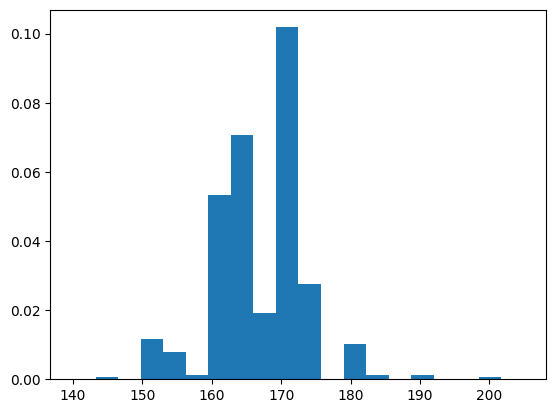

Fecha
2022-10-25 00:00:24    165.0
2022-10-25 00:01:22    170.0
2022-10-25 00:03:03    155.0
2022-10-25 00:03:05    160.0
2022-10-25 00:03:17    165.0
                       ...  
2022-10-25 23:57:57    165.0
2022-10-25 23:58:30    170.0
2022-10-25 23:59:21    170.0
2022-10-25 23:59:34    170.0
2022-10-25 23:59:49    160.0
Name: USD, Length: 1671, dtype: float64
(1650,)


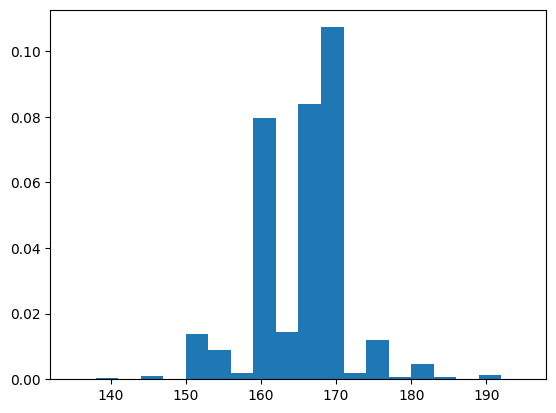

In [52]:
from scipy.stats import shapiro
i = 1500
def detecting_normality(ti):
    if ti.values.shape[0] < 10:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    if new_ti.shape[0] >= i:
        print(ti)
        plt.hist(new_ti, bins=20, density=True)
        print(new_ti.shape)
        plt.show()

    return shapiro(new_ti).pvalue


pvalue = df.groupby('Moneda').resample('d').agg({'Oferta':detecting_normality})

<AxesSubplot:xlabel='Fecha'>

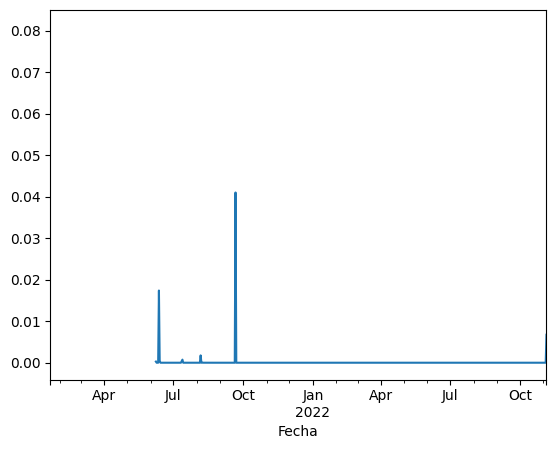

In [30]:
pvalue.loc['MLC'].Oferta.plot()